In [2]:
'''
This program, written by Keunwoo Kim(F429147), displays a summary table of the input artist by genre and the popularity of the artist's song 
with average popularity of the genre for comparison.
The program also visualizes the bar graph that compares the artist's popularity by genre and the average popularity of the genre.
'''

"\nThis program, written by Keunwoo Kim(F429147), displays a summary table of the input artist by genre and the popularity of the artist's song \nwith average popularity of the genre for comparison.\nThe program also visualizes the bar graph that compares the artist's popularity by genre and the average popularity of the genre.\n"

In [3]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [4]:
conn = sqlite3.connect('CWDatabase.db')

query = "SELECT Master_ID, ArtistName, Genre, Popularity, Genre_ID FROM MasterID"

pd.set_option('display.float_format', lambda x: f'{x:.2f}') 

df = pd.read_sql_query(query, conn)

df['Genre'] = df['Genre'].str.split(', ')

Genre_exp = df.explode('Genre')

df_genre = Genre_exp.groupby(['Master_ID', 'ArtistName', 'Genre', 'Popularity']).size()
print(df_genre)

Master_ID  ArtistName       Genre             Popularity
1          DMX              hip hop           71            1
                            pop               71            1
2          Destiny's Child  R&B               70            1
                            pop               70            1
3          112              R&B               63            1
                                                           ..
79         Ariana Grande    pop               77            1
80         DaBaby           hip hop           72            1
81         Billie Eilish    Dance/Electronic  75            1
                            pop               75            1
82         Sech             latin             71            1
Length: 151, dtype: int64


In [5]:
#df filtering
df_genre = df_genre.reset_index()
artist_summary = (
    df_genre.groupby(['ArtistName', 'Genre'])
           .agg(Popularity=('Popularity', 'mean'))
            .reset_index()
)

overall_genre_summary = (
        df_genre.groupby('Genre')
               .agg(Total_Avg=('Popularity', 'mean'))
                .reset_index()
)


In [6]:
#Function defs
def display_line(symbol="*",line_size=10):
    line=line_size*symbol
    print(line)


def display_msg(msg="hello"):
    display_line()
    print("!!!"+msg+"!!!")
    display_line()

def display_menu():
    display_msg("Menu")
    print("s) Summary by Artist")
    print("p) Plot Popularity Comparison")
    print("c) Clear Screen")
    print("e) Exit Program")

def plot_popularity_comparison():
    try:
        artist = str(input("Enter the Artist: "))
        artist_data = artist_summary[artist_summary['ArtistName'] == artist]
        if artist_data.empty:
            print(f"No data available for the Artist {artist}.")
        else:
            artist_data = artist_data.merge(
                overall_genre_summary,
                how="left",
                on="Genre"
            )
            artist_data.plot(
                x="Genre",
                y=["Popularity", "Total_Avg"],
                kind="bar",
                title=f"Comparison of {artist}'s Popularity and Overall Popularity by Genre"
            )
            plt.xlabel("Genre")
            plt.ylabel("Popularity")
            plt.legend(["Artist Popularity", "Overall Popularity"])
            plt.show()
    except Exception as e:
        print(f"Error occurred: {e}")


def display_summary_by_artist():
    try:
        artist = input("Enter the Artist: ")
        artist_data = artist_summary[artist_summary['ArtistName'] == artist]
        if artist_data.empty:
            print(f"No data available for the artist {artist}.")
        else:
            artist_data = artist_data.merge(
                overall_genre_summary,
                how="left",
                on="Genre"
            )
            print(f"Summary for the artist {artist}:")
            print(artist_data)
    except Exception as e:
        print(f"Error occurred: {e}")

**********
!!!Menu!!!
**********
s) Summary by Artist
p) Plot Popularity Comparison
c) Clear Screen
e) Exit Program


Please enter your option p
Enter the Artist:  DMX


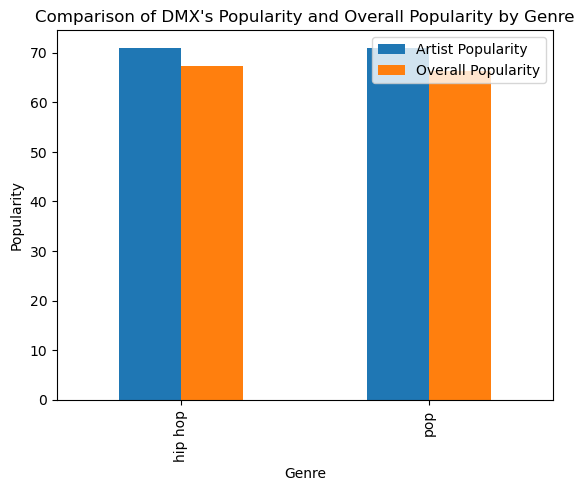

Please enter your option e


Exiting the program.


In [7]:
#Meun
display_menu()

while True: 
    opt=input("Please enter your option")
    if opt== "s":
        display_summary_by_artist()
    elif opt== "p":
        plot_popularity_comparison()
    elif opt=="c":
        clear_output()
        display_menu()
    elif opt== "e":
        print("Exiting the program.")
        break
    else:
        print("Invalid option. Please try again.")